In [2]:
!pip install pandas
!pip install numpy


In [3]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
ds_path = f"/content/drive/MyDrive/Intellipaat-sem2/ML Algo/Assignment_Mushroom_classification/mushrooms.csv"

In [6]:
df_mushroom = pd.read_csv(ds_path)

# 1. Data Exploration


In [7]:
# 1. The first few rows of the dataset
print("df_mushroom.head()")
print(df_mushroom.head())

df_mushroom.head()
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p    

In [8]:

# 2. Info of dataset (column names, non-null count, data types)
print("Dataset Info:")
print(df_mushroom.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-colo

In [9]:
# 3. Look for missing values
print("\nMissing Values in Each Column:")
print(df_mushroom.isnull().sum())

# Get the columns with missing values
columns_with_nulls = df_mushroom.columns[df_mushroom.isnull().any()]

# Print the column names with missing values
print("Columns with missing values:")
print(columns_with_nulls)


Missing Values in Each Column:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
Columns with missing values:
Index([], dtype='object')


In [10]:
# 4. unique values in each column
print("\nUnique Values in Each Column:")
for column in df_mushroom.columns:
    print(f"{column}: {df_mushroom[column].nunique()} unique values")


Unique Values in Each Column:
class: 2 unique values
cap-shape: 6 unique values
cap-surface: 4 unique values
cap-color: 10 unique values
bruises: 2 unique values
odor: 9 unique values
gill-attachment: 2 unique values
gill-spacing: 2 unique values
gill-size: 2 unique values
gill-color: 12 unique values
stalk-shape: 2 unique values
stalk-root: 5 unique values
stalk-surface-above-ring: 4 unique values
stalk-surface-below-ring: 4 unique values
stalk-color-above-ring: 9 unique values
stalk-color-below-ring: 9 unique values
veil-type: 1 unique values
veil-color: 4 unique values
ring-number: 3 unique values
ring-type: 5 unique values
spore-print-color: 9 unique values
population: 6 unique values
habitat: 7 unique values


In [11]:
# 5. Distribution of the target variable ('class')
print("\nTarget Variable [ class ] Distribution:")
print(df_mushroom['class'].value_counts())


Target Variable [ class ] Distribution:
class
e    4208
p    3916
Name: count, dtype: int64


In [12]:
# 6. Basic statistics
print("\nBasic Statistics:")
print(df_mushroom.describe(include='all'))


Basic Statistics:
       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1   

In [13]:
# 7. Check the distribution of values for each categorical column
for column in df_mushroom.columns:
    print(f"\nValue Counts for {column}:")
    print(df_mushroom[column].value_counts())


Value Counts for class:
class
e    4208
p    3916
Name: count, dtype: int64

Value Counts for cap-shape:
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

Value Counts for cap-surface:
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

Value Counts for cap-color:
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

Value Counts for bruises:
bruises
f    4748
t    3376
Name: count, dtype: int64

Value Counts for odor:
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

Value Counts for gill-attachment:
gill-attachment
f    7914
a     210
Name: count, dtype: int64

Value Counts for gill-spacing:
gill-spacing
c    6812
w    1312
Name: count, dtype: int64

Value Counts for gill-size:
gill-size
b    5612
n    2512
Name: count, dtype: int64

Value Counts for gill-co

In [14]:
print(df_mushroom.shape)

(8124, 23)


In [15]:
# Remove data with any missing information for now
null_columns = len(columns_with_nulls)
print(null_columns)
if (null_columns > 0):
  df_mushroom = df_mushroom.dropna()

0


In [15]:
print(df_mushroom.shape)

(8124, 23)


In [16]:
# Get summary stats for the categorical features
df_mushroom.describe(include = ['O'])

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [17]:
df_mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [18]:
# Create the feature/flag for eatable / non eatable
df_mushroom['class'] = df_mushroom['class'].apply(lambda x: 1 if x =='e' else (0 if x == 'p' else -1))

In [19]:
df_mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [20]:
# Check the event rate
df_mushroom['class'].value_counts()/len(df_mushroom)

,count
class,
1,0.517971
0,0.482029


In [21]:
!pip install matplotlib
!pip install seaborn

Text(0, 0.5, 'Count Cap Shape')

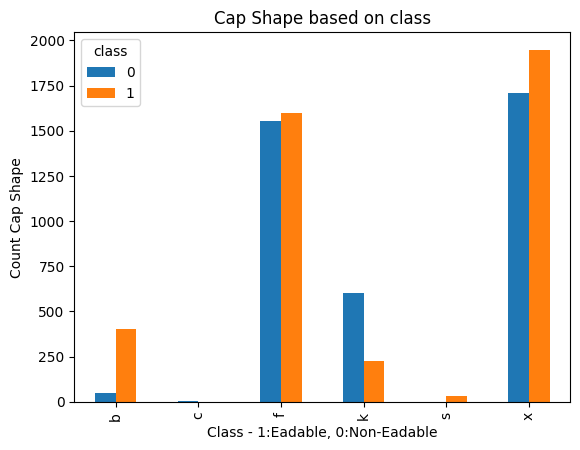

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

pd.crosstab(df_mushroom['cap-shape'],df_mushroom['class']).plot(kind='bar')
plt.title('Cap Shape based on class')
plt.xlabel('Class - 1:Eadable, 0:Non-Eadable')
plt.ylabel('Count Cap Shape')

Text(0, 0.5, 'Freq')

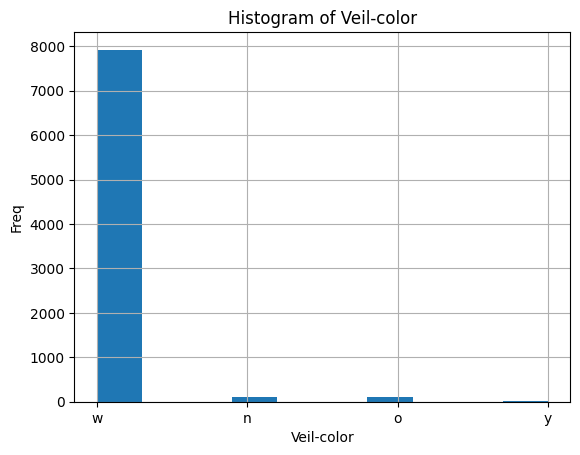

In [23]:
#veil-color: brown=n,orange=o,white=w,yellow=y

df_mushroom['veil-color'].hist()
plt.title('Histogram of Veil-color')
plt.xlabel('Veil-color')
plt.ylabel('Freq')


In [24]:
# Convert the categorical features
# Creating dummies for all these variables
d_cap_shape = pd.get_dummies(df_mushroom['cap-shape'], prefix='cap-shape',dtype=int)
d_cap_surface = pd.get_dummies(df_mushroom['cap-surface'], prefix='cap-surface',dtype=int)
d_cap_color = pd.get_dummies(df_mushroom['cap-color'], prefix='cap-color',dtype=int)
d_bruises = pd.get_dummies(df_mushroom['bruises'], prefix='bruises',dtype=int)
d_odor = pd.get_dummies(df_mushroom['odor'], prefix='odor',dtype=int)
d_gill_attachment = pd.get_dummies(df_mushroom['gill-attachment'], prefix='gill-attachment',dtype=int)
d_gill_spacing = pd.get_dummies(df_mushroom['gill-spacing'], prefix='gill-spacing',dtype=int)
d_gill_size = pd.get_dummies(df_mushroom['gill-size'], prefix='gill-size',dtype=int)
d_gill_color = pd.get_dummies(df_mushroom['gill-color'], prefix='gill-color',dtype=int)
d_stalk_shape = pd.get_dummies(df_mushroom['stalk-shape'], prefix='stalk-shape',dtype=int)
d_stalk_root = pd.get_dummies(df_mushroom['stalk-root'], prefix='stalk-root',dtype=int)
d_stalk_surface_above_ring = pd.get_dummies(df_mushroom['stalk-surface-above-ring'], prefix='stalk-surface-above-ring',dtype=int)
d_stalk_surface_below_ring = pd.get_dummies(df_mushroom['stalk-surface-below-ring'], prefix='stalk-surface-below-ring',dtype=int)
d_stalk_color_above_ring = pd.get_dummies(df_mushroom['stalk-color-above-ring'], prefix='stalk-color-above-ring',dtype=int)
d_stalk_color_below_ring = pd.get_dummies(df_mushroom['stalk-color-below-ring'], prefix='stalk-color-below-ring',dtype=int)
d_veil_type = pd.get_dummies(df_mushroom['veil-type'], prefix='veil-type',dtype=int)
d_veil_color = pd.get_dummies(df_mushroom['veil-color'], prefix='veil-color',dtype=int)
d_ring_number = pd.get_dummies(df_mushroom['ring-number'], prefix='ring-number',dtype=int)
d_ring_type = pd.get_dummies(df_mushroom['ring-type'], prefix='ring-type',dtype=int)
d_spore_print_color = pd.get_dummies(df_mushroom['spore-print-color'], prefix='spore-print-color',dtype=int)
d_population = pd.get_dummies(df_mushroom['population'], prefix='population',dtype=int)
d_habitat = pd.get_dummies(df_mushroom['habitat'], prefix='habitat',dtype=int)



In [25]:
# Create the final dataset with all the relevant features - both dependant and predictors
feature_x_cont = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']

df_mushroom_cont = df_mushroom[feature_x_cont]

# Creating the Final data with all the relevant fields and Dep Variable
df_mushroom_new = pd.concat([df_mushroom['class'],d_cap_shape,d_cap_surface,d_cap_color, d_bruises, d_odor, d_gill_attachment, d_gill_spacing, d_gill_size, d_gill_color, d_stalk_shape, d_stalk_root, d_stalk_surface_above_ring , d_stalk_surface_below_ring, d_stalk_color_above_ring, d_stalk_color_below_ring , d_veil_type, d_veil_color, d_ring_number,d_ring_type , d_spore_print_color, d_population, d_habitat],axis=1)

In [26]:
df_mushroom_new.shape

(8124, 118)

In [27]:
df_mushroom_new.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [28]:
df_mushroom_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 118 entries, class to habitat_w
dtypes: int64(118)
memory usage: 7.3 MB


# Train Test Split

In [29]:
#X = df_mushroom_new.drop('class', axis=1)
#y = df_mushroom_new['class']

X = df_mushroom.drop('class', axis=1)
y = df_mushroom['class']

X = X.map(lambda x: ord(x))

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=42)

# Model Building

In [32]:
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression

In [33]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [34]:
# Step 3: Define the model
model = RandomForestClassifier(random_state=42)

# Step 4: Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],        # Number of trees in the forest
    'max_depth': [None, 10, 20],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples to split
    'min_samples_leaf': [1, 2, 4]          # Minimum number of samples per leaf
}

# Step 5: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,                  # 5-fold cross-validation
    scoring='accuracy',    # Performance metric
    verbose=1,             # Print progress
    n_jobs=-1              # Use all available CPU cores
)

# Step 6: Perform the grid search
grid_search.fit(X_train, y_train)

# Step 7: Print the best hyperparameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 8: Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", test_accuracy)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 1.0
Test Set Accuracy: 1.0


In [35]:
best_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [36]:
best_model.score(X_train,y_train)

1.0

# Model Prediction

In [37]:
y_train_pred=best_model.predict(X_train)

In [38]:
y_test_pred=best_model.predict(X_test)

# Model Evaluation

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve,classification_report

In [40]:
print('Train Accuracy:',accuracy_score(y_train,y_train_pred))
print('Test Accuracy:',accuracy_score(y_test,y_test_pred))
print('Train Recall:',recall_score(y_train,y_train_pred))
print('Test Recall:',recall_score(y_test,y_test_pred))
print('Train Precision:',precision_score(y_train,y_train_pred))
print('Test Precision:',precision_score(y_test,y_test_pred))
print('Train F1 Score:',f1_score(y_train,y_train_pred))
print('Test F1 Score:',f1_score(y_test,y_test_pred))

Train Accuracy: 1.0
Test Accuracy: 1.0
Train Recall: 1.0
Test Recall: 1.0
Train Precision: 1.0
Test Precision: 1.0
Train F1 Score: 1.0
Test F1 Score: 1.0


In [41]:
print(classification_report(y_train,y_train_pred))
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2925
           1       1.00      1.00      1.00      3168

    accuracy                           1.00      6093
   macro avg       1.00      1.00      1.00      6093
weighted avg       1.00      1.00      1.00      6093

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       991
           1       1.00      1.00      1.00      1040

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
DT_gcv=DecisionTreeClassifier()

In [45]:
param_grid = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [1,0.1, .01, .001,0.0001,0.00001],
              'max_depth' : [4,5,6,7,8,9,10,11,12,15],
              'criterion' :['gini', 'entropy','log_loss'],
              'splitter' :['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
             }

In [46]:
model_cv=GridSearchCV(DT_gcv,param_grid,scoring="f1",verbose=2,cv=5,n_jobs=-1)

In [47]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='f1', verbose=2)

In [48]:
best_model=model_cv.best_estimator_
best_param=model_cv.best_params_

In [49]:
print(best_param)

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}


In [ ]:
best_model.fit(X_train,y_train)

In [50]:
y_train_pred_cv=best_model.predict(X_train)

In [51]:
y_test_pred_cv=best_model.predict(X_test)

In [52]:
print(classification_report(y_train,y_train_pred_cv))
print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
print(classification_report(y_test,y_test_pred_cv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2925
           1       1.00      1.00      1.00      3168

    accuracy                           1.00      6093
   macro avg       1.00      1.00      1.00      6093
weighted avg       1.00      1.00      1.00      6093

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       991
           1       1.00      1.00      1.00      1040

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Linear Regression is a basic supervised machine learning algorithm where the relationship between the dependent variable and one or more independent variables is modeled by a straight line (linear equation).

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the model
model = LogisticRegression( )  # Increase max_iter as needed



In [58]:
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_train_pred = model.predict(X_test)
y_test_pred = model.predict(X_test)



In [64]:
print('Train Accuracy:',accuracy_score(y_train,y_train_pred))
print('Test Accuracy:',accuracy_score(y_test,y_test_pred))
print('Train Recall:',recall_score(y_train,y_train_pred))
print('Test Recall:',recall_score(y_test,y_test_pred))
print('Train Precision:',precision_score(y_train,y_train_pred))
print('Test Precision:',precision_score(y_test,y_test_pred))
print('Train F1 Score:',f1_score(y_train,y_train_pred))
print('Test F1 Score:',f1_score(y_test,y_test_pred))
print('Train roc_auc_score:',roc_auc_score(y_train,y_train_pred))
print('Test roc_auc_score:',roc_auc_score(y_test,y_test_pred))

Train Accuracy: 1.0
Test Accuracy: 1.0
Train Recall: 1.0
Test Recall: 1.0
Train Precision: 1.0
Test Precision: 1.0
Train F1 Score: 1.0
Test F1 Score: 1.0
Train roc_auc_score: 1.0
Test roc_auc_score: 1.0


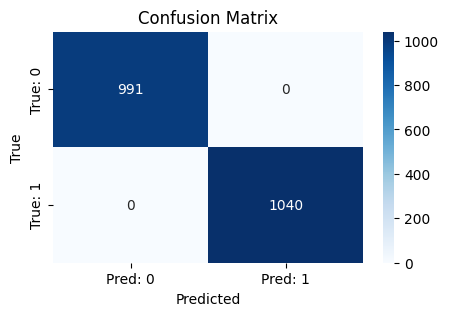

In [70]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test,y_test_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

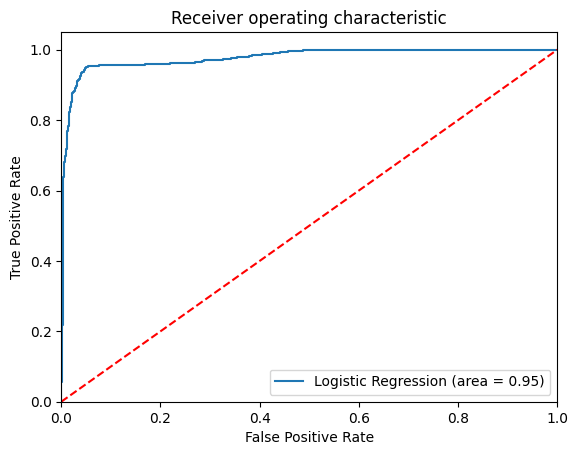

In [71]:
# a graph that shows how well a model performs across all possible thresholds by plotting the true positive rate (TPR)
# against the false positive rate (FPR)
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Hyperparameter tuning with GridSearchCv

In [72]:
from sklearn.metrics import classification_report# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Solvers
    'l1_ratio': [0, 0.5, 1],  # Used only with elasticnet
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters: {'C': 10, 'l1_ratio': 0, 'solver': 'liblinear'}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       991
           1       1.00      1.00      1.00      1040

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [76]:
best_model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


LogisticRegression(C=10, l1_ratio=0, solver='liblinear')

In [77]:
y_test_tred = model.predict(X_test)

# SVM

In [73]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',random_state=0,probability=True)
svm.fit(X_train,y_train)

SVC(probability=True, random_state=0)

In [78]:
y_test_pred = svm.predict(X_test)

In [79]:
y_train_pred = svm.predict(X_train)

In [80]:
print('Train Accuracy:',accuracy_score(y_train,y_train_pred))
print('Test Accuracy:',accuracy_score(y_test,y_test_pred))
print('Train Recall:',recall_score(y_train,y_train_pred))
print('Test Recall:',recall_score(y_test,y_test_pred))
print('Train Precision:',precision_score(y_train,y_train_pred))
print('Test Precision:',precision_score(y_test,y_test_pred))
print('Train F1 Score:',f1_score(y_train,y_train_pred))
print('Test F1 Score:',f1_score(y_test,y_test_pred))
print('Train roc_auc_score:',roc_auc_score(y_train,y_train_pred))
print('Test roc_auc_score:',roc_auc_score(y_test,y_test_pred))

Train Accuracy: 0.995240439849007
Test Accuracy: 0.9980305268340719
Train Recall: 0.9996843434343434
Test Recall: 1.0
Train Precision: 0.9912363067292644
Test Precision: 0.9961685823754789
Train F1 Score: 0.9954424013829954
Test F1 Score: 0.9980806142034548
Train roc_auc_score: 0.9950558469308469
Test roc_auc_score: 0.9979818365287588


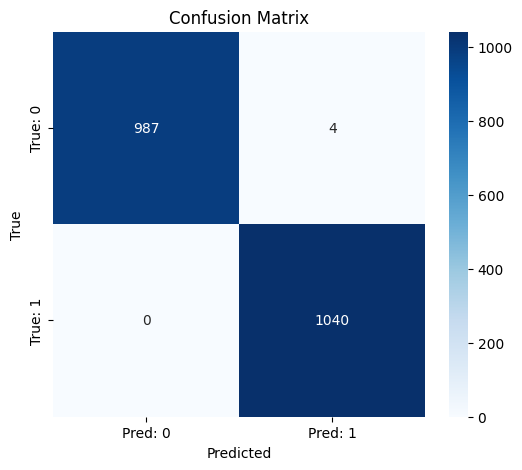

In [81]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

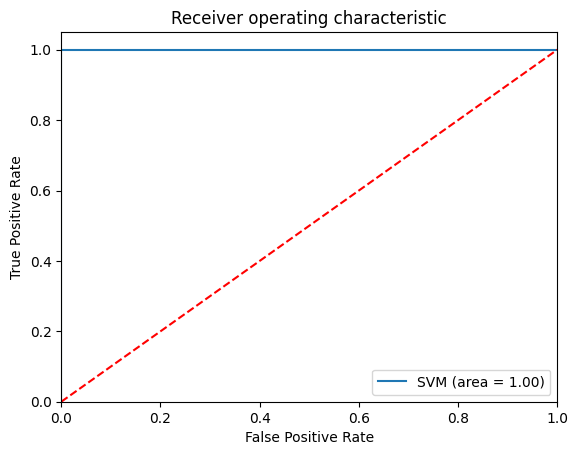

In [82]:
# a graph that shows how well a model performs across all possible thresholds by plotting the true positive rate (TPR)
# against the false positive rate (FPR)
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, svm.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
}

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm,
                               param_grid=param_grid,
                               cv=5,
                               scoring='accuracy',
                               verbose=1,
                               n_jobs=-1)

# Fit the model
grid_search_svm.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search_svm.best_params_)
best_model_svm = grid_search_svm.best_estimator_

# Evaluate the model
y_test_pred = best_model_svm.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits


**Conclusion : Three Models are tried **


1.   RandomForestClassifier
2.   DecisionTreeClassifier   
3.   LogisticRegression
4.   SVM

Both 1, 2 and 4 gave 100% accuracy, however, 3 took substantail time in hyperparamter tunining.